In [1]:
import pandas as pd
import torch
from transformers import GPTNeoForCausalLM, AutoTokenizer
import matplotlib.pyplot as plt

# Load the data from the uploaded CSV file
file_path = 'combined_test_data.csv'
df = pd.read_csv(file_path)

# Select numeric and categorical columns
numerical_df = df.select_dtypes(include=[float, int])
categorical_df = df.select_dtypes(include=[object, 'category'])

# Calculate basic statistics
statistics = {
    'mean': numerical_df.mean(),
    'median': numerical_df.median(),
    'mode': numerical_df.mode().iloc[0],
    'std_dev': numerical_df.std(),
    'variance': numerical_df.var(),
    'skewness': numerical_df.skew(),
    'kurtosis': numerical_df.kurtosis(),
    'correlation': numerical_df.corr()
}

# Prepare the results in a prompt format
prompt = "Here are the statistical results from my data analysis:\n"
for stat_name, stat_value in statistics.items():
    prompt += f"\n{stat_name.capitalize()}:\n{stat_value}\n"
prompt += "\nPlease explain what these statistics indicate about the data."

# Truncate the prompt if necessary
max_input_length = 1024  # Set maximum length for the input
tokenizer = AutoTokenizer.from_pretrained("EleutherAI/gpt-neo-2.7B")

# Set pad_token to eos_token
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token

input_tokens = tokenizer(prompt, return_tensors="pt", padding=True, truncation=True, max_length=max_input_length)


if input_tokens['input_ids'].shape[1] > max_input_length:
    input_tokens = {key: value[:, :max_input_length] for key, value in input_tokens.items()}

# Load the model
model_name = "EleutherAI/gpt-neo-2.7B"
model = GPTNeoForCausalLM.from_pretrained(model_name)

# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Generate the output
outputs = model.generate(
    input_tokens['input_ids'].to(device),
    attention_mask=input_tokens['attention_mask'].to(device),
    max_length=2048 - max_input_length,
    pad_token_id=tokenizer.pad_token_id,
    temperature=0.7,
    top_p=0.9,
    repetition_penalty=1.2,
    do_sample=True
)

# Decode and print the generated explanation
explanation = tokenizer.decode(outputs[0], skip_special_tokens=True)
print("\nGenerated Explanation:\n", explanation)

# Function to plot the selected graph
def plot_graph(graph_types):
    for graph_type in graph_types:
        if graph_type == 'histogram':
            numerical_df.hist(figsize=(10, 8), bins=20)
            plt.suptitle('Histogram of Numeric Data')
        elif graph_type == 'scatter':
            pd.plotting.scatter_matrix(numerical_df, figsize=(10, 8))
            plt.suptitle('Scatter Matrix of Numeric Data')
        elif graph_type == 'line':
            numerical_df.plot(kind='line', figsize=(10, 8))
            plt.title('Line Plot of Numeric Data')
        elif graph_type == 'bar':
            numerical_df.mean().plot(kind='bar', figsize=(10, 8))
            plt.title('Bar Plot of Mean Values')
        elif graph_type == 'box':
            numerical_df.plot(kind='box', figsize=(10, 8))
            plt.title('Box Plot of Numeric Data')
        elif graph_type == 'categorical_bar':
            for col in categorical_df.columns:
                plt.figure(figsize=(10, 6))
                categorical_df[col].value_counts().plot(kind='bar')
                plt.title(f'Bar Plot of {col}')
                plt.ylabel('Frequency')
                plt.xlabel(col)
                plt.show()
        elif graph_type == 'pie':
            for col in categorical_df.columns:
                plt.figure(figsize=(8, 8))
                categorical_df[col].value_counts().plot(kind='pie', autopct='%1.1f%%')
                plt.title(f'Pie Chart of {col}')
                plt.ylabel('')
                plt.show()
        else:
            print(f"Invalid graph type: {graph_type}. Please choose from 'histogram', 'scatter', 'line', 'bar', 'box', 'categorical_bar', 'pie'.")
        plt.show()

# Ask user which graphs they want to plot
graph_types_input = input("Which graphs would you like to plot? (Enter a comma-separated list of types: histogram, scatter, line, bar, box, categorical_bar, pie): ").strip().lower()
graph_types = [g.strip() for g in graph_types_input.split(',')]
plot_graph(graph_types)

Prompt:
 Here are the statistical results from my data analysis:

Mean:
Age        39.732
Height     67.890
Weight    155.186
dtype: float64

Median:
Age        39.0
Height     68.0
Weight    156.0
dtype: float64

Mode:
Age        22
Height     59
Weight    191
Name: 0, dtype: int64

Std_dev:
Age       11.953826
Height     5.908275
Weight    26.570197
dtype: float64

Variance:
Age       142.893964
Height     34.907715
Weight    705.975355
dtype: float64

Skewness:
Age       0.043331
Height   -0.011239
Weight    0.000701
dtype: float64

Kurtosis:
Age      -1.223058
Height   -1.183861
Weight   -1.191479
dtype: float64

Correlation:
             Age    Height    Weight
Age     1.000000  0.021033  0.030184
Height  0.021033  1.000000  0.051449
Weight  0.030184  0.051449  1.000000

Please explain what these statistics indicate about the data.


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(



Generated Explanation:
 Here are the statistical results from my data analysis:

Mean:
Age        39.732
Height     67.890
Weight    155.186
dtype: float64

Median:
Age        39.0
Height     68.0
Weight    156.0
dtype: float64

Mode:
Age        22
Height     59
Weight    191
Name: 0, dtype: int64

Std_dev:
Age       11.953826
Height     5.908275
Weight    26.570197
dtype: float64

Variance:
Age       142.893964
Height     34.907715
Weight    705.975355
dtype: float64

Skewness:
Age       0.043331
Height   -0.011239
Weight    0.000701
dtype: float64

Kurtosis:
Age      -1.223058
Height   -1.183861
Weight   -1.191479
dtype: float64

Correlation:
             Age    Height    Weight
Age     1.000000  0.021033  0.030184
Height  0.021033  1.000000  0.051449
Weight  0.030184  0.051449  1.000000

Please explain what these statistics indicate about the data. I'm particularly interested in the variance and correlation.

A:

The variance is the standard deviation divided by the square root of 

In [1]:
import pandas as pd
import torch
from transformers import GPTNeoForCausalLM, AutoTokenizer
import matplotlib.pyplot as plt

# Load the data from the uploaded CSV file
file_path = 'combined_test_data.csv'
df = pd.read_csv(file_path)

# Select numeric and categorical columns
numerical_df = df.select_dtypes(include=[float, int])
categorical_df = df.select_dtypes(include=[object, 'category'])

# Calculate basic statistics
statistics = {
    'mean': numerical_df.mean(),
    'median': numerical_df.median(),
    'mode': numerical_df.mode().iloc[0],
    'std_dev': numerical_df.std(),
    'variance': numerical_df.var(),
    'skewness': numerical_df.skew(),
    'kurtosis': numerical_df.kurtosis(),
    'correlation': numerical_df.corr()
}

# Prepare the results in a prompt format
prompt = "Here are the statistical results from my data analysis:\n"
for stat_name, stat_value in statistics.items():
    prompt += f"\n{stat_name.capitalize()}:\n{stat_value}\n"
prompt += "\nPlease explain what these statistics indicate about the data."

# Truncate the prompt if necessary
max_input_length = 1024  # Set maximum length for the input
tokenizer = AutoTokenizer.from_pretrained("EleutherAI/gpt-neo-2.7B")

# Set pad_token to eos_token
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token

input_tokens = tokenizer(prompt, return_tensors="pt", padding=True, truncation=True, max_length=max_input_length)


if input_tokens['input_ids'].shape[1] > max_input_length:
    input_tokens = {key: value[:, :max_input_length] for key, value in input_tokens.items()}

# Load the model
model_name = "EleutherAI/gpt-neo-2.7B"
model = GPTNeoForCausalLM.from_pretrained(model_name)

# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Generate the output
outputs = model.generate(
    input_tokens['input_ids'].to(device),
    attention_mask=input_tokens['attention_mask'].to(device),
    max_length=2048 - max_input_length,
    pad_token_id=tokenizer.pad_token_id,
    temperature=0.7,
    top_p=0.9,
    repetition_penalty=1.2,
    do_sample=True
)

# Decode and print the generated explanation
explanation = tokenizer.decode(outputs[0], skip_special_tokens=True)
print("\nGenerated Explanation:\n", explanation)

# Function to plot the selected graph
def plot_graph(graph_types):
    for graph_type in graph_types:
        if graph_type == 'histogram':
            numerical_df.hist(figsize=(10, 8), bins=20)
            plt.suptitle('Histogram of Numeric Data')
        elif graph_type == 'scatter':
            pd.plotting.scatter_matrix(numerical_df, figsize=(10, 8))
            plt.suptitle('Scatter Matrix of Numeric Data')
        elif graph_type == 'line':
            numerical_df.plot(kind='line', figsize=(10, 8))
            plt.title('Line Plot of Numeric Data')
        elif graph_type == 'bar':
            numerical_df.mean().plot(kind='bar', figsize=(10, 8))
            plt.title('Bar Plot of Mean Values')
        elif graph_type == 'box':
            numerical_df.plot(kind='box', figsize=(10, 8))
            plt.title('Box Plot of Numeric Data')
        elif graph_type == 'categorical_bar':
            for col in categorical_df.columns:
                plt.figure(figsize=(10, 6))
                categorical_df[col].value_counts().plot(kind='bar')
                plt.title(f'Bar Plot of {col}')
                plt.ylabel('Frequency')
                plt.xlabel(col)
                plt.show()
        elif graph_type == 'pie':
            for col in categorical_df.columns:
                plt.figure(figsize=(8, 8))
                categorical_df[col].value_counts().plot(kind='pie', autopct='%1.1f%%')
                plt.title(f'Pie Chart of {col}')
                plt.ylabel('')
                plt.show()
        else:
            print(f"Invalid graph type: {graph_type}. Please choose from 'histogram', 'scatter', 'line', 'bar', 'box', 'categorical_bar', 'pie'.")
        plt.show()

# Ask user which graphs they want to plot
graph_types_input = input("Which graphs would you like to plot? (Enter a comma-separated list of types: histogram, scatter, line, bar, box, categorical_bar, pie): ").strip().lower()
graph_types = [g.strip() for g in graph_types_input.split(',')]
plot_graph(graph_types)

Prompt:
 Here are the statistical results from my data analysis:

Mean:
Age        39.732
Height     67.890
Weight    155.186
dtype: float64

Median:
Age        39.0
Height     68.0
Weight    156.0
dtype: float64

Mode:
Age        22
Height     59
Weight    191
Name: 0, dtype: int64

Std_dev:
Age       11.953826
Height     5.908275
Weight    26.570197
dtype: float64

Variance:
Age       142.893964
Height     34.907715
Weight    705.975355
dtype: float64

Skewness:
Age       0.043331
Height   -0.011239
Weight    0.000701
dtype: float64

Kurtosis:
Age      -1.223058
Height   -1.183861
Weight   -1.191479
dtype: float64

Correlation:
             Age    Height    Weight
Age     1.000000  0.021033  0.030184
Height  0.021033  1.000000  0.051449
Weight  0.030184  0.051449  1.000000

Please explain what these statistics indicate about the data.


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(



Generated Explanation:
 Here are the statistical results from my data analysis:

Mean:
Age        39.732
Height     67.890
Weight    155.186
dtype: float64

Median:
Age        39.0
Height     68.0
Weight    156.0
dtype: float64

Mode:
Age        22
Height     59
Weight    191
Name: 0, dtype: int64

Std_dev:
Age       11.953826
Height     5.908275
Weight    26.570197
dtype: float64

Variance:
Age       142.893964
Height     34.907715
Weight    705.975355
dtype: float64

Skewness:
Age       0.043331
Height   -0.011239
Weight    0.000701
dtype: float64

Kurtosis:
Age      -1.223058
Height   -1.183861
Weight   -1.191479
dtype: float64

Correlation:
             Age    Height    Weight
Age     1.000000  0.021033  0.030184
Height  0.021033  1.000000  0.051449
Weight  0.030184  0.051449  1.000000

Please explain what these statistics indicate about the data.

A:

I can see that you are trying to find the correlation between Age and Height. You are doing this with the corrcoef function in sci

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(



Generated Explanation:
 Here are the statistical results from my data analysis:

Mean:
Age        39.732
Height     67.890
Weight    155.186
dtype: float64

Median:
Age        39.0
Height     68.0
Weight    156.0
dtype: float64

Mode:
Age        22
Height     59
Weight    191
Name: 0, dtype: int64

Std_dev:
Age       11.953826
Height     5.908275
Weight    26.570197
dtype: float64

Variance:
Age       142.893964
Height     34.907715
Weight    705.975355
dtype: float64

Skewness:
Age       0.043331
Height   -0.011239
Weight    0.000701
dtype: float64

Kurtosis:
Age      -1.223058
Height   -1.183861
Weight   -1.191479
dtype: float64

Correlation:
             Age    Height    Weight
Age     1.000000  0.021033  0.030184
Height  0.021033  1.000000  0.051449
Weight  0.030184  0.051449  1.000000

Please explain what these statistics indicate about the data. 

A:

I think you have the data in a way that makes it hard to tell what's going on.  This is not a standard plot, but I think this mig

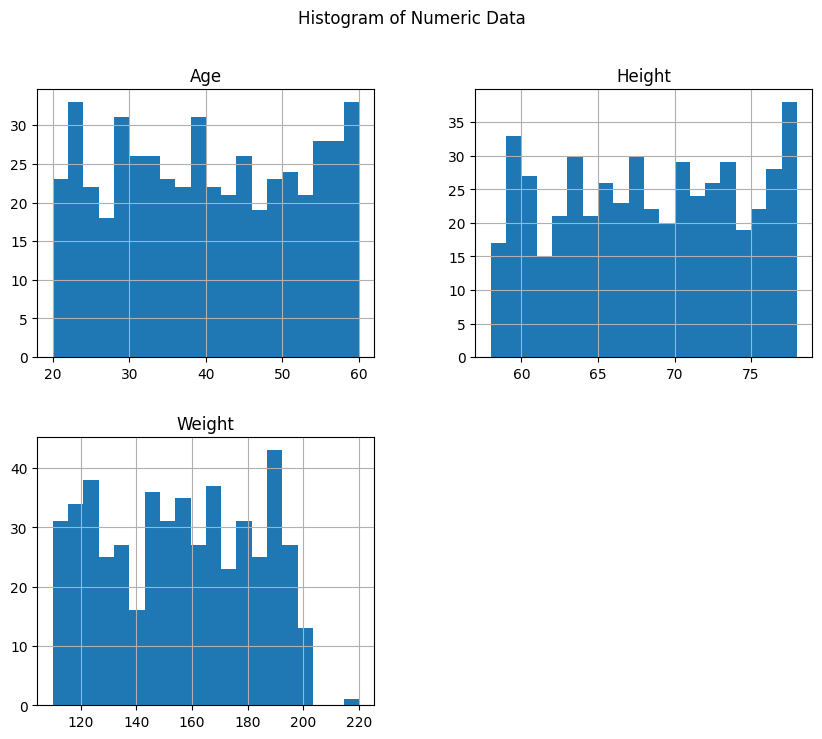

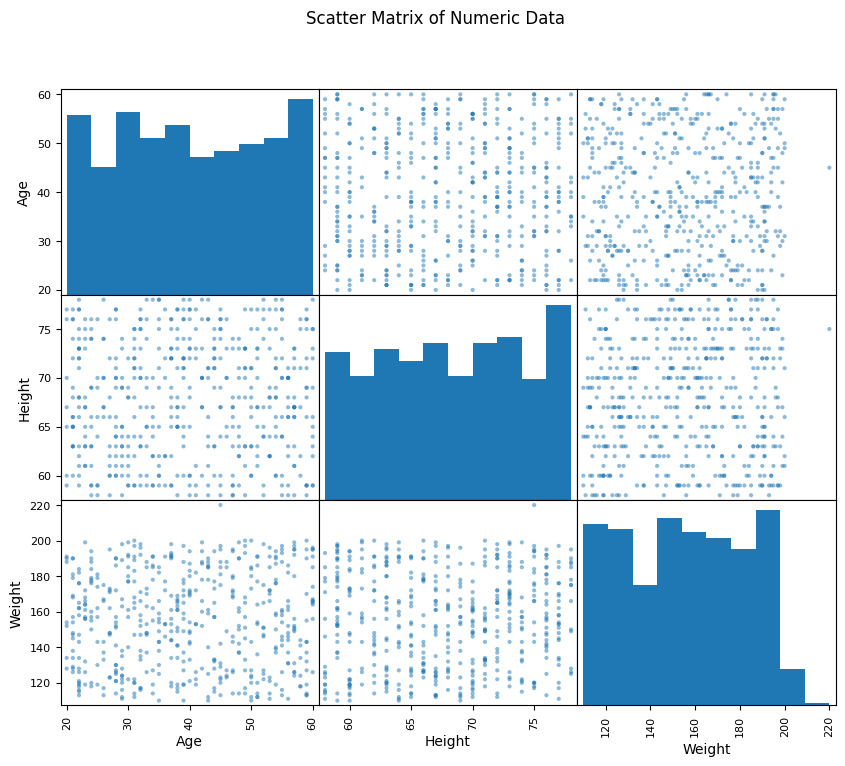

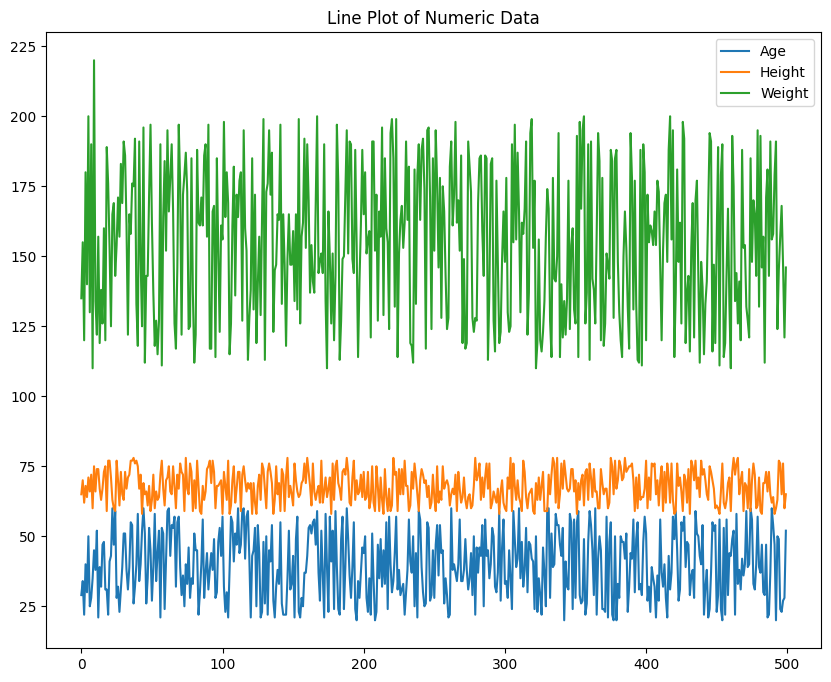

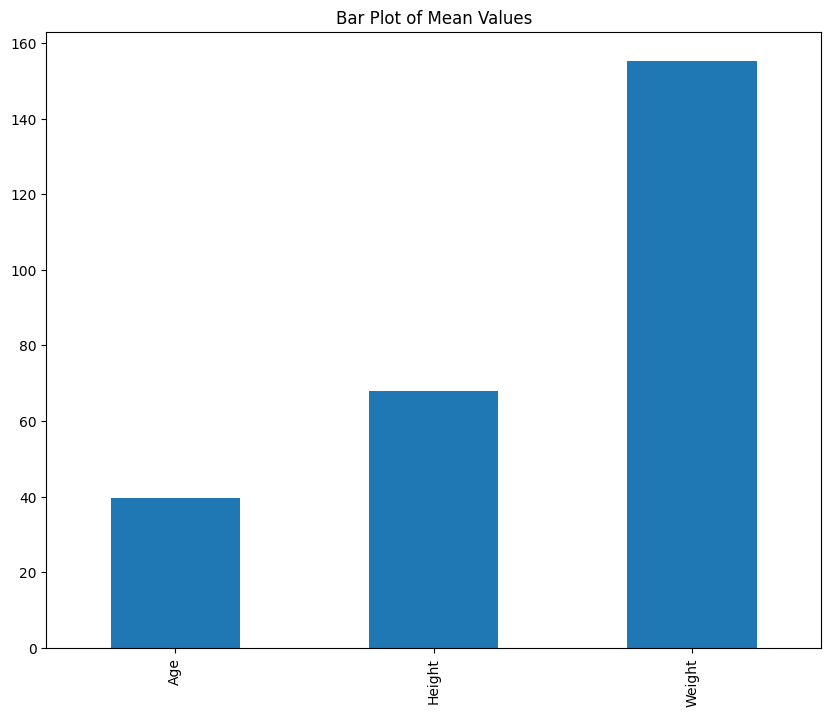

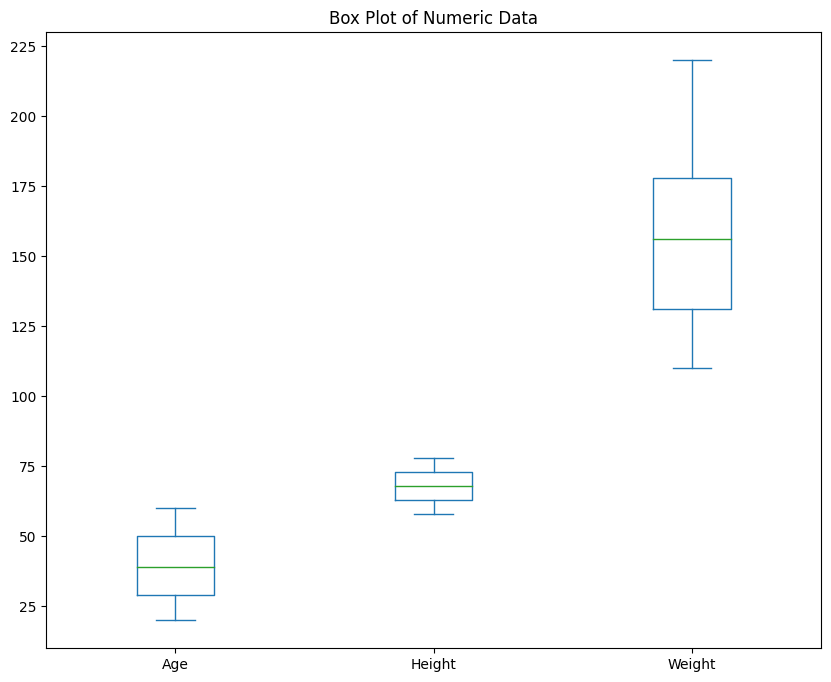

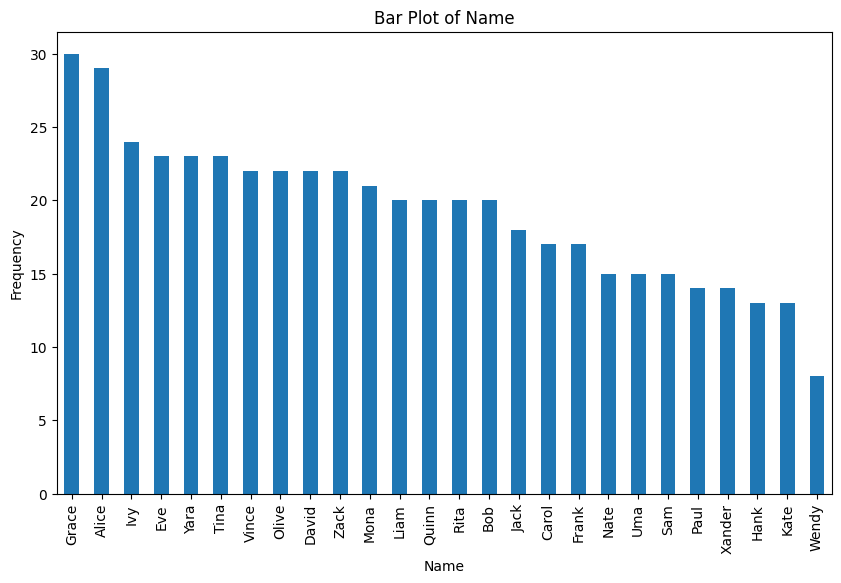

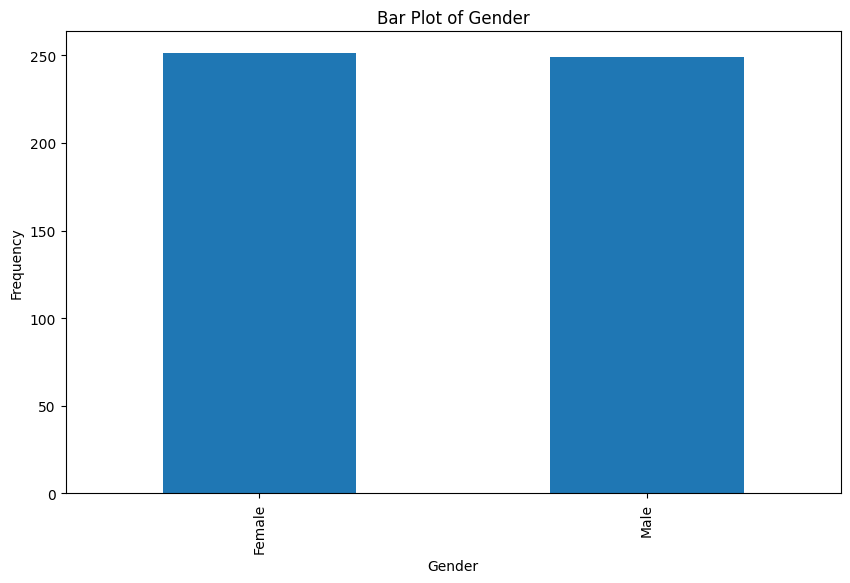

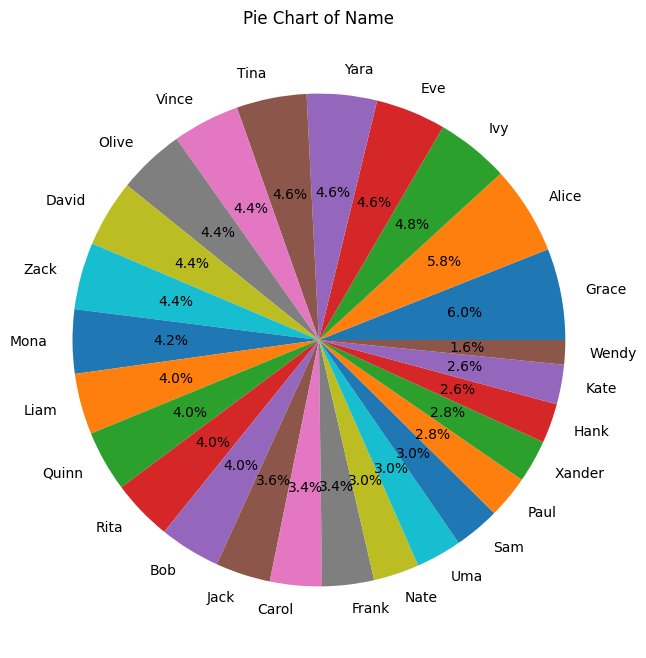

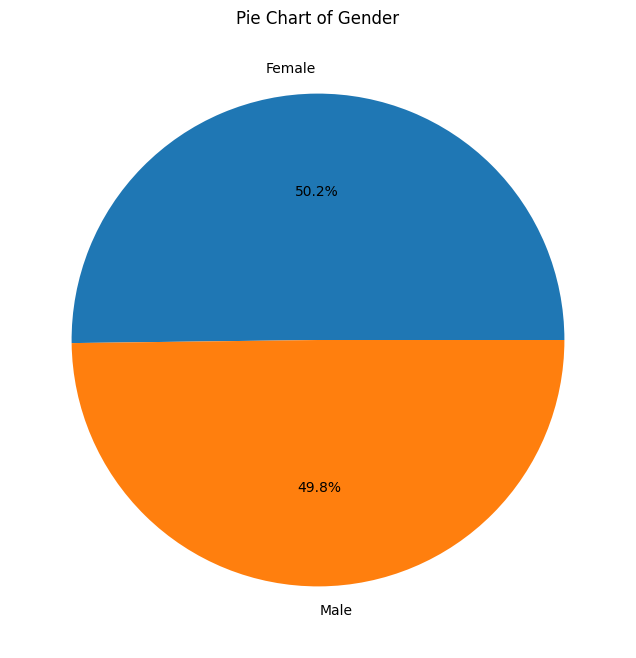

In [1]:
import pandas as pd
import torch
from transformers import GPTNeoForCausalLM, AutoTokenizer
import matplotlib.pyplot as plt

# Load the data from the uploaded CSV file
file_path = 'combined_test_data.csv'
df = pd.read_csv(file_path)

# Select numeric and categorical columns
numerical_df = df.select_dtypes(include=[float, int])
categorical_df = df.select_dtypes(include=[object, 'category'])

# Calculate basic statistics
statistics = {
    'mean': numerical_df.mean(),
    'median': numerical_df.median(),
    'mode': numerical_df.mode().iloc[0],
    'std_dev': numerical_df.std(),
    'variance': numerical_df.var(),
    'skewness': numerical_df.skew(),
    'kurtosis': numerical_df.kurtosis(),
    'correlation': numerical_df.corr()
}

# Prepare the results in a prompt format
prompt = "Here are the statistical results from my data analysis:\n"
for stat_name, stat_value in statistics.items():
    prompt += f"\n{stat_name.capitalize()}:\n{stat_value}\n"
prompt += "\nPlease explain what these statistics indicate about the data."

# Truncate the prompt if necessary
max_input_length = 1024  # Set maximum length for the input
tokenizer = AutoTokenizer.from_pretrained("EleutherAI/gpt-neo-2.7B")

# Set pad_token to eos_token
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token

input_tokens = tokenizer(prompt, return_tensors="pt", padding=True, truncation=True, max_length=max_input_length)


if input_tokens['input_ids'].shape[1] > max_input_length:
    input_tokens = {key: value[:, :max_input_length] for key, value in input_tokens.items()}

# Load the model
model_name = "EleutherAI/gpt-neo-2.7B"
model = GPTNeoForCausalLM.from_pretrained(model_name)

# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Generate the output
outputs = model.generate(
    input_tokens['input_ids'].to(device),
    attention_mask=input_tokens['attention_mask'].to(device),
    max_length=2048 - max_input_length,
    pad_token_id=tokenizer.pad_token_id,
    temperature=0.7,
    top_p=0.9,
    repetition_penalty=1.2,
    do_sample=True
)

# Decode and print the generated explanation
explanation = tokenizer.decode(outputs[0], skip_special_tokens=True)
print("\nGenerated Explanation:\n", explanation)

# Function to plot the selected graph
def plot_graph(graph_types):
    for graph_type in graph_types:
        if graph_type == 'histogram':
            numerical_df.hist(figsize=(10, 8), bins=20)
            plt.suptitle('Histogram of Numeric Data')
        elif graph_type == 'scatter':
            pd.plotting.scatter_matrix(numerical_df, figsize=(10, 8))
            plt.suptitle('Scatter Matrix of Numeric Data')
        elif graph_type == 'line':
            numerical_df.plot(kind='line', figsize=(10, 8))
            plt.title('Line Plot of Numeric Data')
        elif graph_type == 'bar':
            numerical_df.mean().plot(kind='bar', figsize=(10, 8))
            plt.title('Bar Plot of Mean Values')
        elif graph_type == 'box':
            numerical_df.plot(kind='box', figsize=(10, 8))
            plt.title('Box Plot of Numeric Data')
        elif graph_type == 'categorical_bar':
            for col in categorical_df.columns:
                plt.figure(figsize=(10, 6))
                categorical_df[col].value_counts().plot(kind='bar')
                plt.title(f'Bar Plot of {col}')
                plt.ylabel('Frequency')
                plt.xlabel(col)
                plt.show()
        elif graph_type == 'pie':
            for col in categorical_df.columns:
                plt.figure(figsize=(8, 8))
                categorical_df[col].value_counts().plot(kind='pie', autopct='%1.1f%%')
                plt.title(f'Pie Chart of {col}')
                plt.ylabel('')
                plt.show()
        else:
            print(f"Invalid graph type: {graph_type}. Please choose from 'histogram', 'scatter', 'line', 'bar', 'box', 'categorical_bar', 'pie'.")
        plt.show()

# Ask user which graphs they want to plot
graph_types_input = input("Which graphs would you like to plot? (Enter a comma-separated list of types: histogram, scatter, line, bar, box, categorical_bar, pie): ").strip().lower()
graph_types = [g.strip() for g in graph_types_input.split(',')]
plot_graph(graph_types)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/200 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.46k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/90.0 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/10.7G [00:00<?, ?B/s]


Generated Explanation:
 Here are the statistical results from my data analysis:

Mean:
Age        39.732
Height     67.890
Weight    155.186
dtype: float64

Median:
Age        39.0
Height     68.0
Weight    156.0
dtype: float64

Mode:
Age        22
Height     59
Weight    191
Name: 0, dtype: int64

Std_dev:
Age       11.953826
Height     5.908275
Weight    26.570197
dtype: float64

Variance:
Age       142.893964
Height     34.907715
Weight    705.975355
dtype: float64

Skewness:
Age       0.043331
Height   -0.011239
Weight    0.000701
dtype: float64

Kurtosis:
Age      -1.223058
Height   -1.183861
Weight   -1.191479
dtype: float64

Correlation:
             Age    Height    Weight
Age     1.000000  0.021033  0.030184
Height  0.021033  1.000000  0.051449
Weight  0.030184  0.051449  1.000000

Please explain what these statistics indicate about the data. I'm not asking you to do the statistical analysis, just tell me what you think they mean.

A:

It looks like you have a mix of continuo

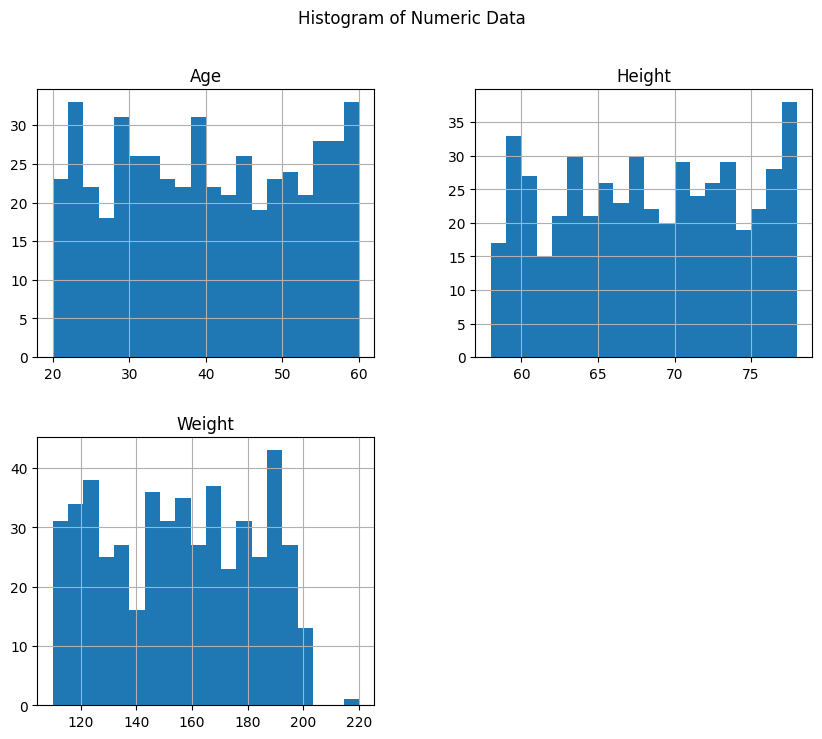

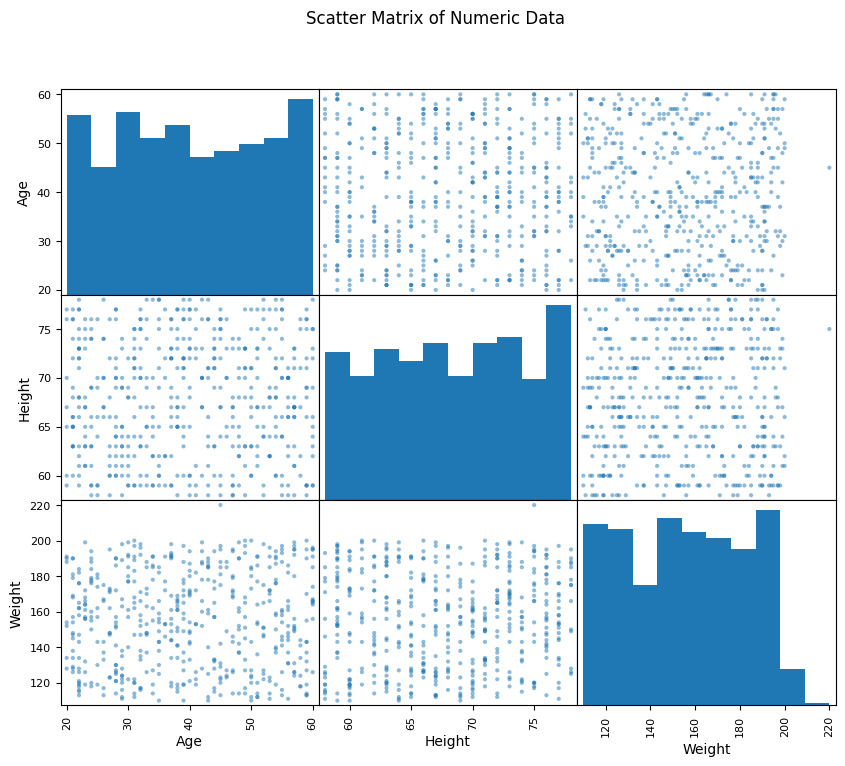

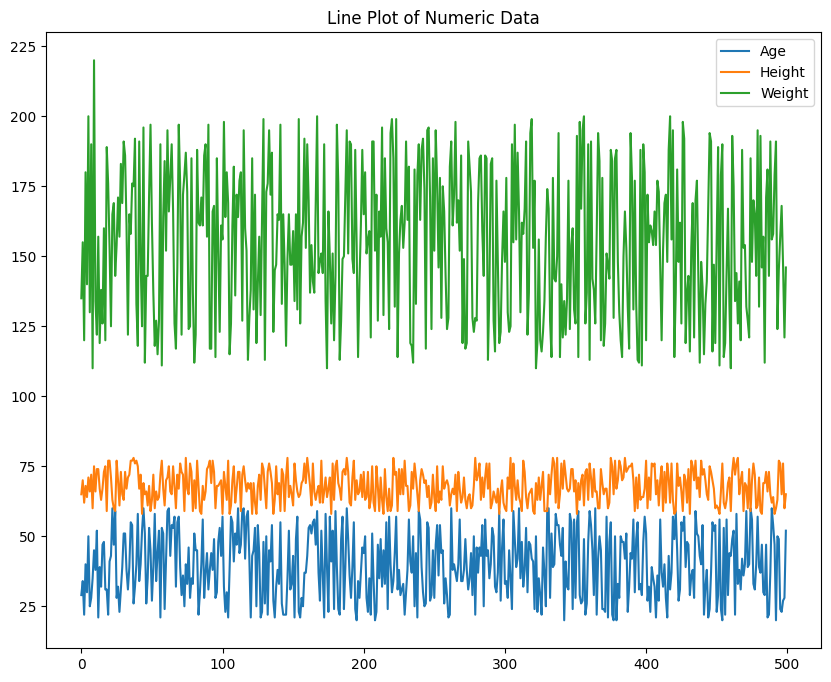

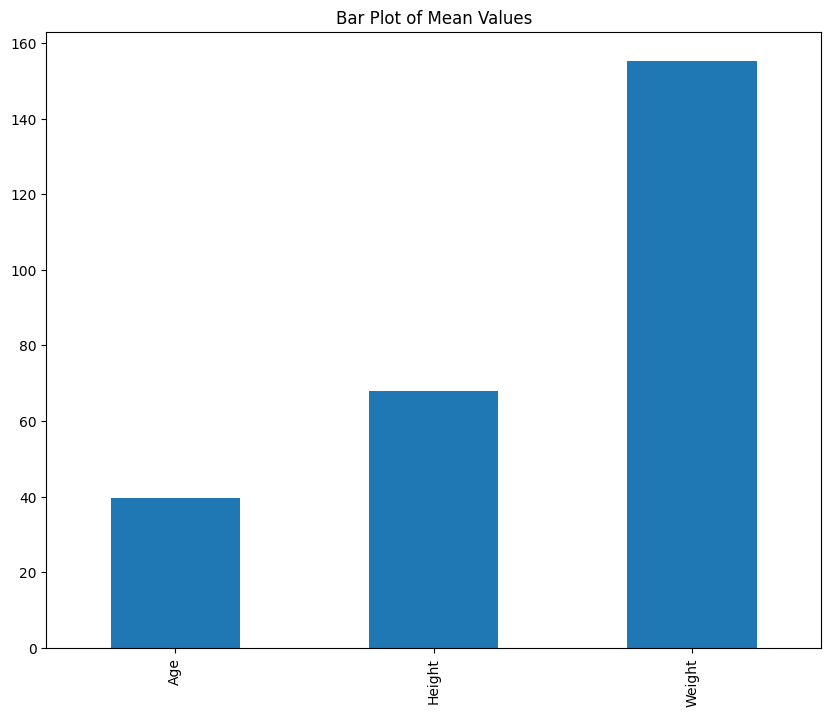

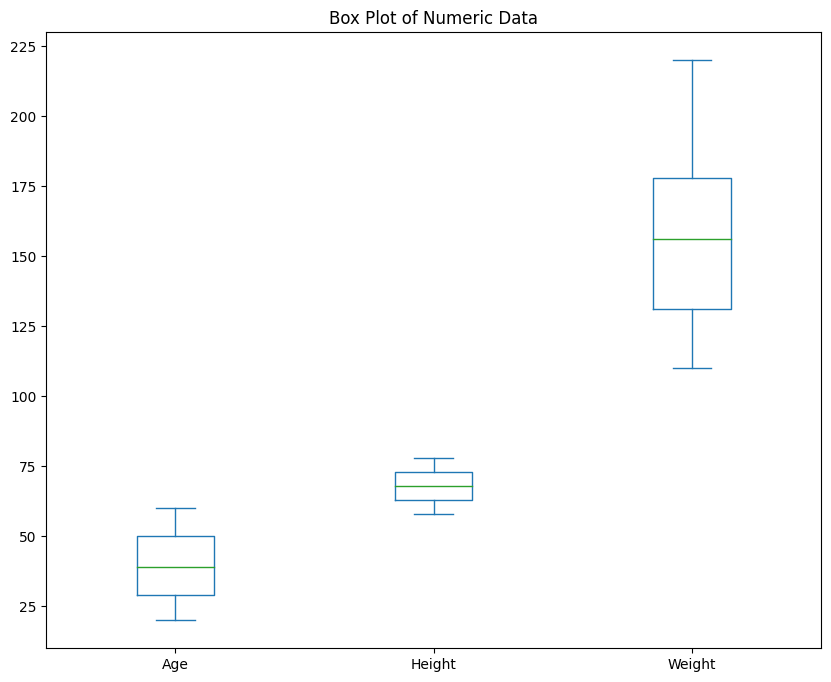

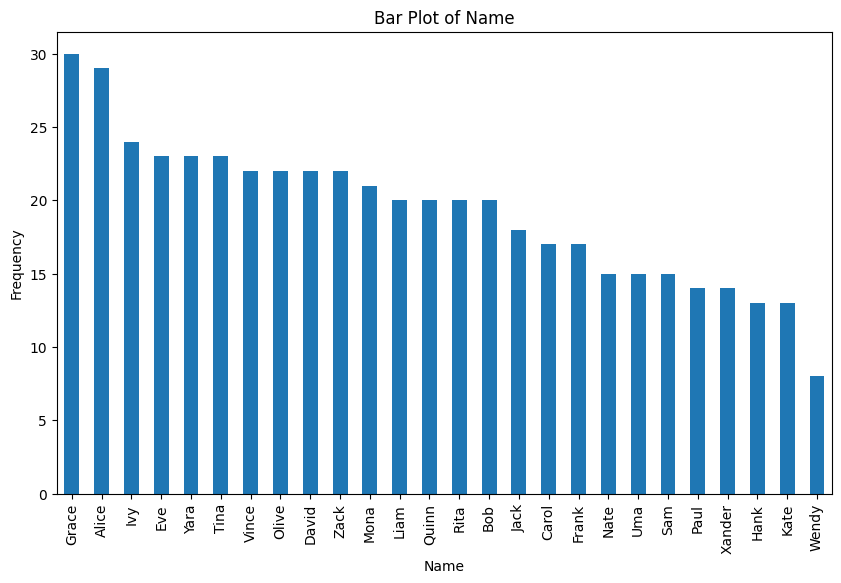

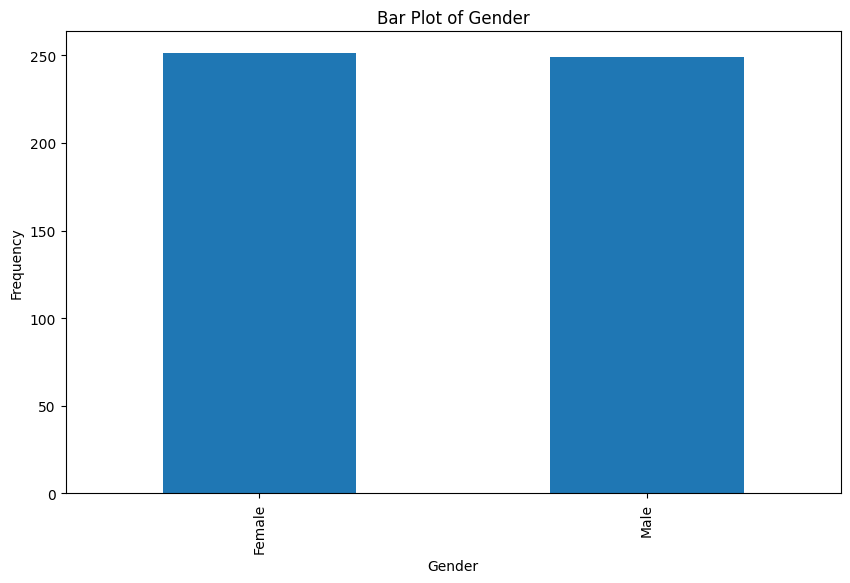

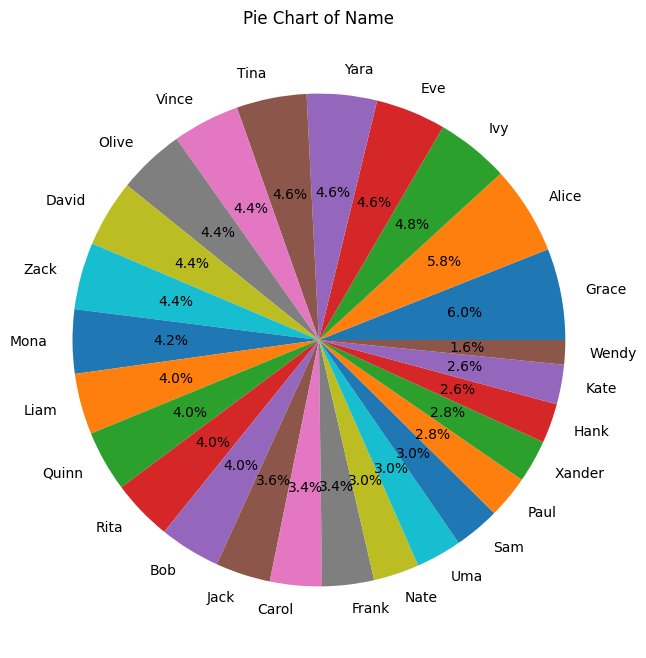

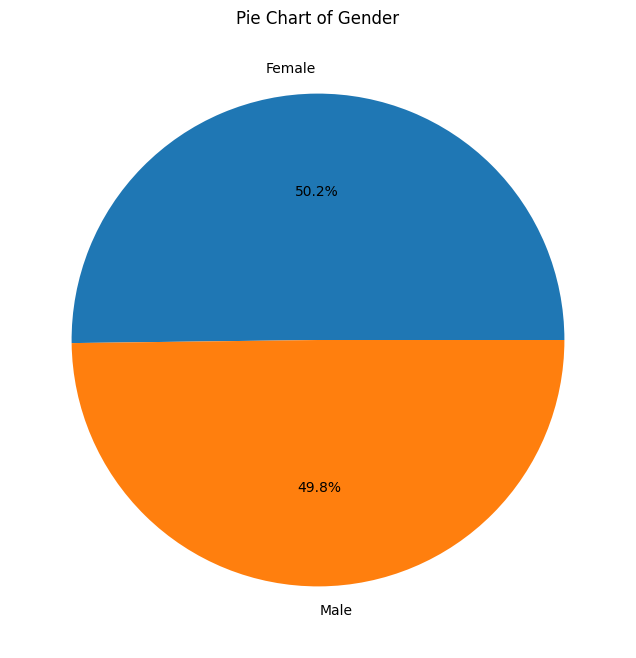

In [1]:
import pandas as pd
import torch
from transformers import GPTNeoForCausalLM, AutoTokenizer
import matplotlib.pyplot as plt

# Load the data from the uploaded CSV file
file_path = 'combined_test_data.csv'
df = pd.read_csv(file_path)

# Select numeric and categorical columns
numerical_df = df.select_dtypes(include=[float, int])
categorical_df = df.select_dtypes(include=[object, 'category'])

# Calculate basic statistics
statistics = {
    'mean': numerical_df.mean(),
    'median': numerical_df.median(),
    'mode': numerical_df.mode().iloc[0],
    'std_dev': numerical_df.std(),
    'variance': numerical_df.var(),
    'skewness': numerical_df.skew(),
    'kurtosis': numerical_df.kurtosis(),
    'correlation': numerical_df.corr()
}

# Prepare the results in a prompt format
prompt = "Here are the statistical results from my data analysis:\n"
for stat_name, stat_value in statistics.items():
    prompt += f"\n{stat_name.capitalize()}:\n{stat_value}\n"
prompt += "\nPlease explain what these statistics indicate about the data."

# Truncate the prompt if necessary
max_input_length = 1024  # Set maximum length for the input
tokenizer = AutoTokenizer.from_pretrained("EleutherAI/gpt-neo-2.7B")

# Set pad_token to eos_token
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token

input_tokens = tokenizer(prompt, return_tensors="pt", padding=True, truncation=True, max_length=max_input_length)


if input_tokens['input_ids'].shape[1] > max_input_length:
    input_tokens = {key: value[:, :max_input_length] for key, value in input_tokens.items()}

# Load the model
model_name = "EleutherAI/gpt-neo-2.7B"
model = GPTNeoForCausalLM.from_pretrained(model_name)

# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Generate the output
outputs = model.generate(
    input_tokens['input_ids'].to(device),
    attention_mask=input_tokens['attention_mask'].to(device),
    max_length=2048 - max_input_length,
    pad_token_id=tokenizer.pad_token_id,
    temperature=0.7,
    top_p=0.9,
    repetition_penalty=1.2,
    do_sample=True
)

# Decode and print the generated explanation
explanation = tokenizer.decode(outputs[0], skip_special_tokens=True)
print("\nGenerated Explanation:\n", explanation)

# Function to plot the selected graph
def plot_graph(graph_types):
    for graph_type in graph_types:
        if graph_type == 'histogram':
            numerical_df.hist(figsize=(10, 8), bins=20)
            plt.suptitle('Histogram of Numeric Data')
        elif graph_type == 'scatter':
            pd.plotting.scatter_matrix(numerical_df, figsize=(10, 8))
            plt.suptitle('Scatter Matrix of Numeric Data')
        elif graph_type == 'line':
            numerical_df.plot(kind='line', figsize=(10, 8))
            plt.title('Line Plot of Numeric Data')
        elif graph_type == 'bar':
            numerical_df.mean().plot(kind='bar', figsize=(10, 8))
            plt.title('Bar Plot of Mean Values')
        elif graph_type == 'box':
            numerical_df.plot(kind='box', figsize=(10, 8))
            plt.title('Box Plot of Numeric Data')
        elif graph_type == 'categorical_bar':
            for col in categorical_df.columns:
                plt.figure(figsize=(10, 6))
                categorical_df[col].value_counts().plot(kind='bar')
                plt.title(f'Bar Plot of {col}')
                plt.ylabel('Frequency')
                plt.xlabel(col)
                plt.show()
        elif graph_type == 'pie':
            for col in categorical_df.columns:
                plt.figure(figsize=(8, 8))
                categorical_df[col].value_counts().plot(kind='pie', autopct='%1.1f%%')
                plt.title(f'Pie Chart of {col}')
                plt.ylabel('')
                plt.show()
        else:
            print(f"Invalid graph type: {graph_type}. Please choose from 'histogram', 'scatter', 'line', 'bar', 'box', 'categorical_bar', 'pie'.")
        plt.show()

# Ask user which graphs they want to plot
graph_types_input = input("Which graphs would you like to plot? (Enter a comma-separated list of types: histogram, scatter, line, bar, box, categorical_bar, pie): ").strip().lower()
graph_types = [g.strip() for g in graph_types_input.split(',')]
plot_graph(graph_types)

In [ ]:
import pandas as pd
import torch
from transformers import GPTNeoForCausalLM, AutoTokenizer
from fastapi import FastAPI, File, UploadFile
from fastapi.responses import JSONResponse
from fastapi.background import BackgroundTasks
import matplotlib.pyplot as plt
import uvicorn
import nest_asyncio
import logging

nest_asyncio.apply()

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

app = FastAPI()

# Load the model and tokenizer
model_name = "EleutherAI/gpt-neo-2.7B"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = GPTNeoForCausalLM.from_pretrained(model_name)

# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

@app.post("/upload/")
async def upload_file(file: UploadFile):
    logger.info("Received file upload request")
    df = pd.read_csv(file.file)
    numerical_df = df.select_dtypes(include=[float, int])
    categorical_df = df.select_dtypes(include=[object, 'category'])

    # Calculate basic statistics
    statistics = {
        'mean': numerical_df.mean().to_dict(),
        'median': numerical_df.median().to_dict(),
        'mode': numerical_df.mode().iloc[0].to_dict(),
        'std_dev': numerical_df.std().to_dict(),
        'variance': numerical_df.var().to_dict(),
        'skewness': numerical_df.skew().to_dict(),
        'kurtosis': numerical_df.kurtosis().to_dict(),
        'correlation': numerical_df.corr().to_dict()
    }

    logger.info("Calculated statistics")
    return JSONResponse(content={"statistics": statistics})

@app.post("/generate_explanation/")
async def generate_explanation(statistics: dict):
    logger.info("Received generate explanation request")
    # Prepare the results in a prompt format
    prompt = "Here are the statistical results from my data analysis:\n"
    for stat_name, stat_value in statistics.items():
        prompt += f"\n{stat_name.capitalize()}:\n{stat_value}\n"
    prompt += "\nPlease explain what these statistics indicate about the data."

    # Truncate the prompt if necessary
    max_input_length = 1024

    # Set pad_token to eos_token if pad_token is not set
    if tokenizer.pad_token is None:
        tokenizer.pad_token = tokenizer.eos_token

    input_tokens = tokenizer(prompt, return_tensors="pt", padding=True, truncation=True, max_length=max_input_length)

    # Ensure the input length does not exceed the maximum length
    if input_tokens['input_ids'].shape[1] > max_input_length:
        input_tokens = {key: value[:, :max_input_length] for key, value in input_tokens.items()}

    # Generate the output with adjustments
    outputs = model.generate(
        input_tokens['input_ids'].to(device),
        attention_mask=input_tokens['attention_mask'].to(device),
        max_length=2048 - max_input_length,
        pad_token_id=tokenizer.pad_token_id,
        temperature=0.7,
        top_p=0.9,
        repetition_penalty=1.2,
        do_sample=True
    )

    # Decode and return the generated explanation
    explanation = tokenizer.decode(outputs[0], skip_special_tokens=True)
    logger.info("Generated explanation")
    return {"explanation": explanation}

@app.post("/plot_graph/")
async def plot_graph(graph_types: str, file: UploadFile, background_tasks: BackgroundTasks):
    logger.info("Received plot graph request")
    df = pd.read_csv(file.file)
    numerical_df = df.select_dtypes(include=[float, int])
    categorical_df = df.select_dtypes(include=[object, 'category'])

    graph_types = [g.strip() for g in graph_types.split(',')]

    def plot_and_save(graph_types, numerical_df, categorical_df):
        for graph_type in graph_types:
            if graph_type == 'histogram':
                numerical_df.hist(figsize=(10, 8), bins=20)
                plt.suptitle('Histogram of Numeric Data')
            elif graph_type == 'scatter':
                pd.plotting.scatter_matrix(numerical_df, figsize=(10, 8))
                plt.suptitle('Scatter Matrix of Numeric Data')
            elif graph_type == 'line':
                numerical_df.plot(kind='line', figsize=(10, 8))
                plt.title('Line Plot of Numeric Data')
            elif graph_type == 'bar':
                numerical_df.mean().plot(kind='bar', figsize=(10, 8))
                plt.title('Bar Plot of Mean Values')
            elif graph_type == 'box':
                numerical_df.plot(kind='box', figsize=(10, 8))
                plt.title('Box Plot of Numeric Data')
            elif graph_type == 'categorical_bar':
                for col in categorical_df.columns:
                    plt.figure(figsize=(10, 6))
                    categorical_df[col].value_counts().plot(kind='bar')
                    plt.title(f'Bar Plot of {col}')
                    plt.ylabel('Frequency')
                    plt.xlabel(col)
                    plt.show()
            elif graph_type == 'pie':
                for col in categorical_df.columns:
                    plt.figure(figsize=(8, 8))
                    categorical_df[col].value_counts().plot(kind='pie', autopct='%1.1f%%')
                    plt.title(f'Pie Chart of {col}')
                    plt.ylabel('')
                    plt.show()
            else:
                print(f"Invalid graph type: {graph_type}. Please choose from 'histogram', 'scatter', 'line', 'bar', 'box', 'categorical_bar', 'pie'.")
            plt.savefig(f'{graph_type}.png')
            plt.clf()

    background_tasks.add_task(plot_and_save, graph_types, numerical_df, categorical_df)
    logger.info("Added background task for plotting graphs")
    return {"message": "Graphs are being generated and saved as PNG files."}

if __name__ == "__main__":
    uvicorn.run(app, host="127.0.0.1", port=8001)